# 데이터 분석하기

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
# pandas의 데이터프레임 형태로 데이터 불러오기
data_in_path = './sources/'
train_data_path = data_in_path + 'labeledTrainData.tsv'
train_data = pd.read_csv(train_data_path, header=0, delimiter='\t', quoting=3)

- 사용할 데이터가 탭(\t)으로 구분되어 있으므로 delimeter 인자에 '\t'를 설정
- 각 데이터에 각 항목명(Header)이 포함돼 있기 때문에 header 인자에 0을 설정
- 쌍따옴표를 무시하기 위해 quoting 인자에 3을 설정

In [3]:
# head 함수를 사용하여 상위 5개의 데이터 확인
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


### 데이터 분석 과정
1. 데이터 크기
2. 데이터의 개수
3. 각 리뷰의 문자 길이 분포
4. 많이 사용된 단어
5. 긍정, 부정 데이터의 분포
6. 각 리뷰의 단어 개수 분포
7. 특수문자 및 대문자, 소문자 비율

### 1. 데이터 크기

In [4]:
# 데이터 크기 확인
print("File size: ")
for file in os.listdir(data_in_path):
    if 'tsv' in file:
        print(file.ljust(30) + str(round(os.path.getsize(data_in_path + file) / 10**6 , 2)) + ' MB')

File size: 
labeledTrainData.tsv          33.56 MB
testData.tsv                  32.72 MB
unlabeledTrainData.tsv        67.28 MB


- os 라이브러리를 사용해 해당 경로의 파일 목록 가져오기
- tsv 파일인지 확인
- 라벨이 없는 데이터가 가장 큰것을 확인 할 수 있음


### 2. 데이터의 개수

In [5]:
# 학습 데이터에 대해 개수 확인
print(f"전체 학습 데이터의 개수: {len(train_data)}")

전체 학습 데이터의 개수: 25000


### 3. 각 리뷰의 문자 길이 분포

In [6]:
# 각 데이터의 문자의 길이 확인
train_lenght = train_data['review'].apply(len)
train_lenght.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

- review 열에 있는 데이터의 길이를 변수로 정함
- 해당 변수에는 각 리뷰의 길이가 담겨있음

Text(0, 0.5, 'Number of review')

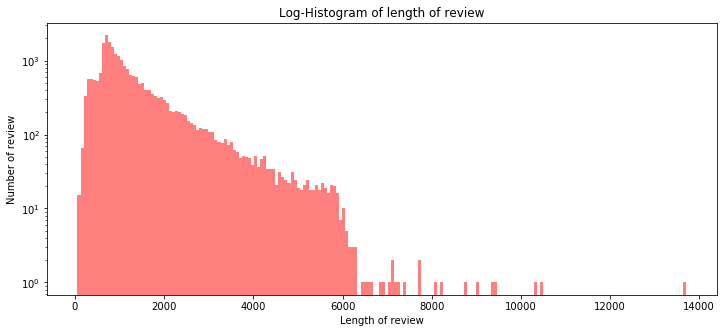

In [7]:
# matplotlib을 사용해 히스토그램 그리기
plt.figure(figsize=(12,5))
plt.hist(train_lenght, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

- plt.figure()
    - 그래프에 대한 이미지 크기 선언
    - figure: (가로, 세로)  형태의 튜플로 입력 
    
- plt.hist()
    - 히스토그램 선언
    - bins: 히스토그램 값에 대한 버킷 범위
    - range: x축 값의 범위
    - alpha: 그래프 색상 투명도
    - color: 그래프 색상
    - label: 그래프에 대한 라벨

- plt.yscale()


- plt.title()
    - 그래프 제목

- plt.xlabel()
    - 그래프 x 축 라벨

- plt.ylabel()
    - 그래프 y 축 라벨


In [8]:
# 리뷰 길이에 관한 몇가지 통계값
print(f"리뷰 길이 최대값: {np.max(train_lenght)}")
print(f"리뷰 길이 최소값: {np.min(train_lenght)}")
print(f"리뷰 길이 평균값: {np.mean(train_lenght):.2f}")
print(f"리뷰 길이 표준편차: {np.std(train_lenght):.2f}")
print(f"리뷰 길이 중간값: {np.median(train_lenght)}")
# 사분위의 대한 경우는 0 ~ 100 스케일로 돼 있음
print(f"리뷰 길이 제1사분위: {np.percentile(train_lenght, 25)}")
print(f"리뷰 길이 제3사분위: {np.percentile(train_lenght, 75)}")

리뷰 길이 최대값: 13710
리뷰 길이 최소값: 54
리뷰 길이 평균값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간값: 983.0
리뷰 길이 제1사분위: 705.0
리뷰 길이 제3사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x833c8ceb88>,
 'caps': [<matplotlib.lines.Line2D at 0x832d9eef88>,
 'boxes': [<matplotlib.lines.Line2D at 0x832d9ee308>],
 'medians': [<matplotlib.lines.Line2D at 0x833c733348>],
 'fliers': [<matplotlib.lines.Line2D at 0x832d9e73c8>],
 'means': [<matplotlib.lines.Line2D at 0x833c7333c8>]}

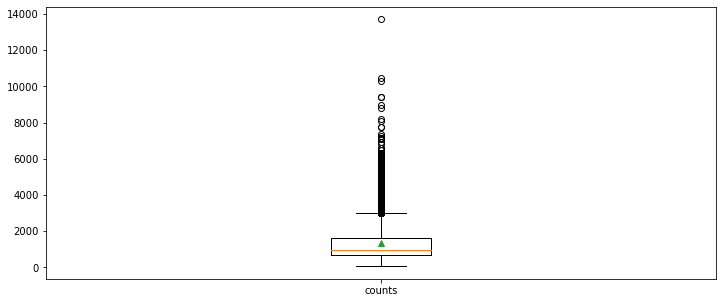

In [9]:
# 박스 플롯 그리기
plt.figure(figsize=(12, 5))
plt.boxplot(train_lenght, labels=['counts'], showmeans=True)

- plot.boxplot()
    - 박스 플롯 생성
    - 첫 번째 인자: 여러 분포에 대한 데이터 리스트를 입력
    - labels: 입력한 데이터에 대한 라벨
    - showmeans: 평균값을 마크함

### 4. 많이 사용된 단어

(-0.5, 599.5, 399.5, -0.5)

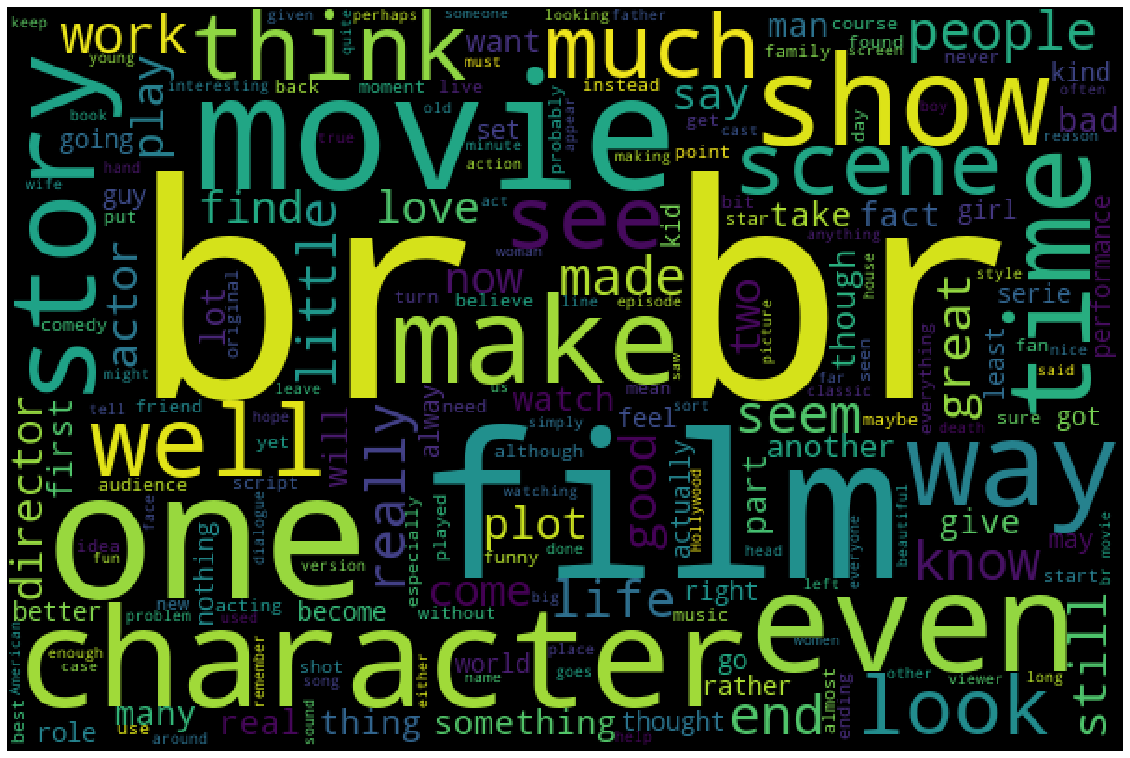

In [10]:
from wordcloud import WordCloud

cloud = WordCloud(width=600, height=400).generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

### 5. 긍정, 부정 데이터의 분포

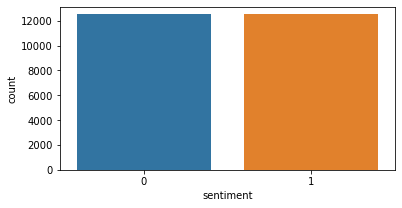

In [11]:
# 라벨 데이터의 분포를 확인
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

In [12]:
print(f"부정 리뷰 개수: {train_data['sentiment'].value_counts()[0]}")
print(f"긍정 리뷰 개수: {train_data['sentiment'].value_counts()[1]}")

부정 리뷰 개수: 12500
긍정 리뷰 개수: 12500


### 6. 각 리뷰의 단어 개수 분포

In [13]:
# 각 리뷰를 단어 기준으로 나눠서 각 리뷰당 단어의 개수 확인
# 각 단어의 길이를 가지는 변수를 설정
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of review')

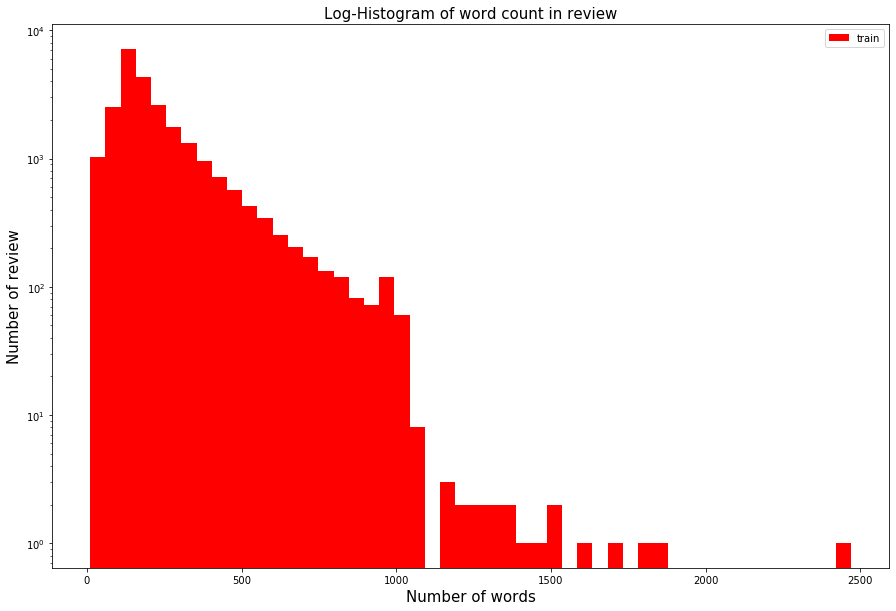

In [14]:
# 리뷰당 단어 개수에 대한 히스토그램 그리기
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of review', fontsize=15)

In [15]:
# 리뷰 단어 개수에 관한 몇가지 통계값
print(f"리뷰 단어 개수 최대값: {np.max(train_word_counts)}")
print(f"리뷰 단어 개수 최소값: {np.min(train_word_counts)}")
print(f"리뷰 단어 개수 평균값: {np.mean(train_word_counts):.2f}")
print(f"리뷰 단어 개수 표준편차: {np.std(train_word_counts):.2f}")
print(f"리뷰 단어 개수 중간값: {np.median(train_word_counts)}")
# 사분위의 대한 경우는 0 ~ 100 스케일로 돼 있음
print(f"리뷰 단어 개수 제1사분위: {np.percentile(train_word_counts, 25)}")
print(f"리뷰 단어 개수 제3사분위: {np.percentile(train_word_counts, 75)}")

리뷰 단어 개수 최대값: 2470
리뷰 단어 개수 최소값: 10
리뷰 단어 개수 평균값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간값: 174.0
리뷰 단어 개수 제1사분위: 127.0
리뷰 단어 개수 제3사분위: 284.0


### 7. 특수문자 및 대문자, 소문자 비율

In [16]:
# 각 리뷰에 대해 구두점과 대소문자 비율 값 확인
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x])))

In [17]:
print(f"물음표가 있는 질문: {qmarks * 100 :.2f}%")
print(f"마참표가 있는 질문: {fullstop * 100 :.2f}%")
print(f"첫 글자가 대문자인 질문: {capital_first * 100 :.2f}%")
print(f"대문자가 있는 질문: {capitals * 100 :.2f}%")
print(f"숫자가 있는 질문: {numbers * 100 :.2f}%")

물음표가 있는 질문: 29.55%
마참표가 있는 질문: 99.69%
첫 글자가 대문자인 질문: 0.00%
대문자가 있는 질문: 99.59%
숫자가 있는 질문: 56.66%


- 위 분석을 통해 전처리 과정 중 대문자를 소문자로 바꾸고 특수 문자를 제거해야 함을 알 수 있음